In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
#Read CSV into df
BTC = pd.read_csv('BTC-USD (3).csv')
BTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-26,47180.464844,48370.785156,44454.843750,46339.761719,46339.761719,350967941479
1,2021-02-27,46344.773438,48253.269531,45269.027344,46188.453125,46188.453125,45910946382
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451
3,2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112
4,2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720
...,...,...,...,...,...,...,...
360,2022-02-21,38423.210938,39394.437500,36950.476563,37075.281250,37075.281250,29280402798
361,2022-02-22,37068.769531,38359.855469,36488.933594,38286.027344,38286.027344,25493150450
362,2022-02-23,38285.281250,39122.394531,37201.816406,37296.570313,37296.570313,21849073843
363,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093


In [3]:
#Calculate TypicalPrice, 5Day Moving Avg of Typical Price,Upperand Lower Bounds for TypicaalPrice Moving Avg
BTC['Date'] = pd.to_datetime(BTC['Date'], format = '%Y-%m-%d')
BTC['TypicalPrice'] = (BTC['Close']+BTC['Low']+BTC['High'])/3

BTC['TypicalPriceMovingAvg5'] = BTC['TypicalPrice'].rolling(window=5).mean()
std1=BTC.loc[:,"TypicalPriceMovingAvg5"].std()
BTC['UpperBound'] = BTC['TypicalPriceMovingAvg5'] + 2 * std1
BTC['LowerBound'] = BTC['TypicalPriceMovingAvg5'] - 2 * std1

BTC
type(BTC['Date'].values[0])

,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,LowerBound
0,2021-02-26,47180.464844,48370.785156,44454.843750,46339.761719,46339.761719,350967941479,46388.463542,NaN,NaN,NaN
1,2021-02-27,46344.773438,48253.269531,45269.027344,46188.453125,46188.453125,45910946382,46570.250000,NaN,NaN,NaN
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,NaN
3,2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112,48176.783854,NaN,NaN,NaN
4,2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720,48578.447917,46949.176823,65292.881617,28605.472029
...,...,...,...,...,...,...,...,...,...,...,...
360,2022-02-21,38423.210938,39394.437500,36950.476563,37075.281250,37075.281250,29280402798,37806.731771,39723.764844,58067.469638,21380.060050
361,2022-02-22,37068.769531,38359.855469,36488.933594,38286.027344,38286.027344,25493150450,37711.605469,38938.062240,57281.767034,20594.357446
362,2022-02-23,38285.281250,39122.394531,37201.816406,37296.570313,37296.570313,21849073843,37873.593750,38472.931250,56816.636044,20129.226456
363,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093,37253.555990,37906.702865,56250.407659,19562.998071


numpy.datetime64

<AxesSubplot:title={'center':'Closing Price, Moving Avg'}, xlabel='Date'>

<AxesSubplot:title={'center':'Trade Volume'}, xlabel='Date'>

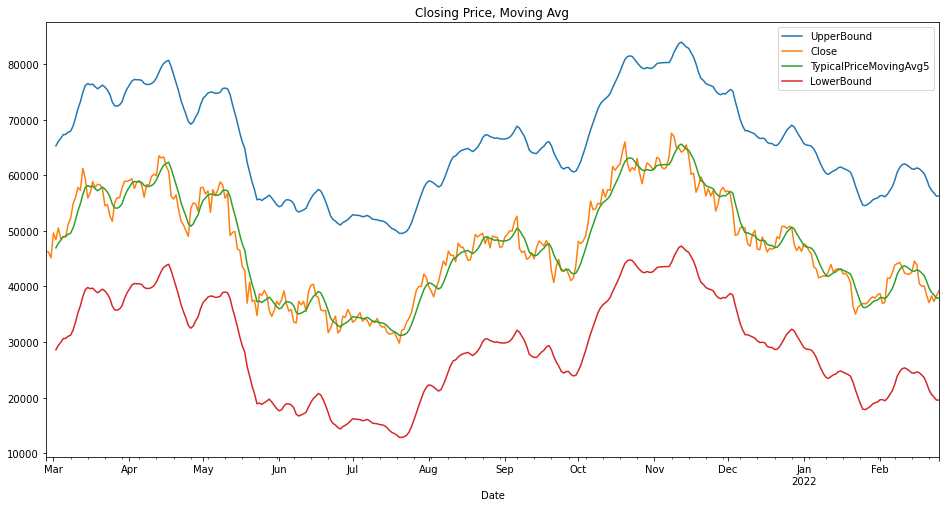

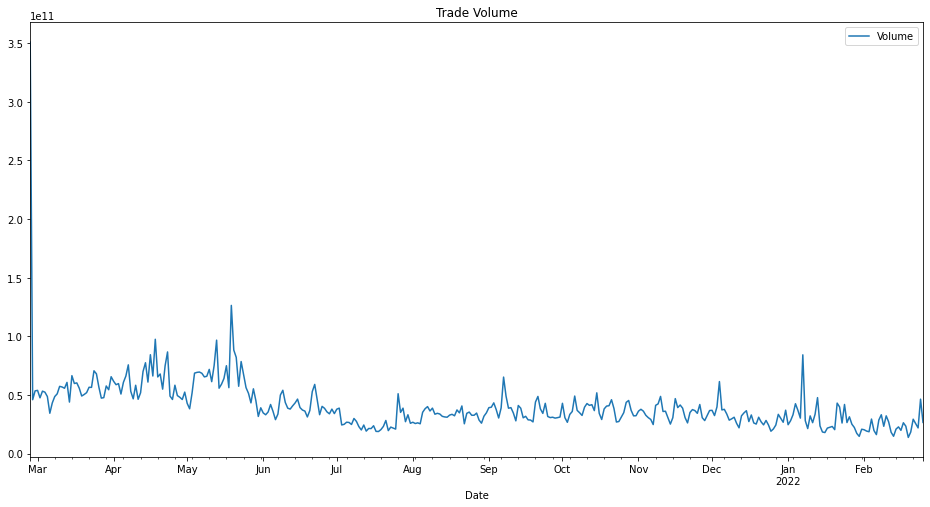

In [4]:
#Plot the Closing Price and 5DayMovingAvg of Typical Price and the bounds on the given timeline
#Look at the trading volume spikes

BTC.plot(x='Date',y=['UpperBound','Close','TypicalPriceMovingAvg5','LowerBound'],Label='Close',figsize=(16,8),title='Closing Price, Moving Avg')
BTC.plot(x='Date',y='Volume',Label='Trading Volume',figsize=(16,8),title='Trade Volume')

plt.legend()




In [5]:
#Read CSV into df
BTC_Tweets = pd.read_csv('archive.zip')
BTC_Tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347465,Pyscho Ape,"New York, USA",Meet Psycho Ape unique NFT project build on #p...,2019-12-17 00:57:37,1959.0,5002.0,4472.0,False,2022-03-02 16:38:23,👑Psycho Ape is an exclusive collection of uniq...,"['NFTCommunity', 'NFTGiveaway', 'art', 'NFTdro...",Twitter for iPhone,False
2347466,🇺🇦 Thomas T. Thai 🌻,NaN,"Simple guy skilled in leadership, business, fi...",2018-02-23 07:51:16,3745.0,14.0,3193.0,False,2022-03-02 16:38:21,#Russia (#Putin) invaliding #Ukraine is unfort...,"['Russia', 'Putin', 'Ukraine', 'crypto', 'BTC'...",Twitter Web App,False
2347467,Bitcoin Bot🤖,server,I Tweet the latest #Bitcoin price every 5 min....,2021-10-01 17:41:03,725.0,1.0,26.0,False,2022-03-02 16:38:21,Current #Bitcoin Price is $44370 #BTC #Crypto,"['Bitcoin', 'BTC', 'Crypto']",IAmBitcoinBot,False
2347468,Sajjad Hossain,NaN,Follow me and 💯💯💯💯💯💯💯💯💯💯\nFollow back...,2021-04-10 15:39:16,4069.0,4697.0,1205.0,False,2022-03-02 16:38:14,#11MINUTES #BTC #CRYPTO\n\nThis is very intere...,"['11MINUTES', 'BTC', 'CRYPTO']",Twitter for Android,False


In [6]:
#Look at sample tweet messages
column_text = BTC_Tweets['text']
column_text


0          Blue Ridge Bank shares halted by NYSE after #b...
1          😎 Today, that's this #Thursday, we will do a "...
2          Guys evening, I have read this article about B...
3          $BTC A big chance in a billion! Price: \487264...
4          This network is secured by 9 508 nodes as of t...
                                 ...                        
2347465    👑Psycho Ape is an exclusive collection of uniq...
2347466    #Russia (#Putin) invaliding #Ukraine is unfort...
2347467        Current #Bitcoin Price is $44370 #BTC #Crypto
2347468    #11MINUTES #BTC #CRYPTO\n\nThis is very intere...
2347469    #Orijin #Polygon #IDO #BSC #Eth #BTC #Airdrop ...
Name: text, Length: 2347470, dtype: object

In [7]:
#See if any field is NA.
BTC_Tweets.isna().any()
#Find the sum for isna.
BTC_Tweets.isna().sum()

user_name            True
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
is_retweet           True
dtype: bool

user_name                31
user_location       1138085
user_description     281909
user_created              0
user_followers            0
user_friends              0
user_favourites           0
user_verified             0
date                      0
text                      0
hashtags              16991
source                 3559
is_retweet              245
dtype: int64

In [8]:
BTC_Tweets[BTC_Tweets.date.isna()==True].head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


In [9]:
#Drop NA
BTC_Tweets.dropna(how = 'any', subset=['date','source'], inplace=True)
BTC_Tweets[2178180:2178185]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2181724,Prince Newas Mahmud,NaN,NaN,2021-06-28 02:12:49,6198.0,6014.0,24596.0,False,2022-01-22 16:39:30,This project that a certain type of business s...,"['fideliscrypto', 'crypto', 'investment', 'fid...",Twitter Web App,False
2181725,Zark,Canada,account reborn 👀\nI left #BTC for #Bitcoin\nfa...,2019-07-21 13:12:10,54.0,62.0,212.0,False,2022-01-22 16:39:27,I don't know how you can think that I'm going ...,['BTC'],Twitter for Android,False
2181726,Dani VB,NaN,@Dogecola - #DogeBull / #BNB / #BTC,2021-08-21 14:11:22,227.0,676.0,14824.0,False,2022-01-22 16:39:26,"@AltcoinWorldcom I'm buying DogeCola, it will ...","['DogeCola', 'DogeBull', 'btc', 'bnb']",Twitter for Android,False
2181727,Aman A,NaN,Marketing (Growth & Brand) 🚀 | Crypto & NFT Wa...,2014-03-03 18:33:29,156.0,618.0,1538.0,False,2022-01-22 16:39:22,Over a billion liquidations in #Crypto in the ...,"['Crypto', 'ETH', 'BTC', 'altcoins']",Twitter for iPhone,False
2181728,Rahul,"Jaipur,Rajasthan",A CRICKET ENTHUSIAST #BLEEDBLUE,2012-09-29 02:37:40,6508.0,1676.0,1193.0,False,2022-01-22 16:39:16,@CheekyCrypto @Aether_Crypto gonna change your...,"['AETHERV2', 'ATH', 'AETHER', 'BSCGem', 'BTC',...",Twitter for Android,False


In [10]:
#isna is detecting missing values for date and sum is returning the number of missing values in each column.
BTC_Tweets.date.isna().sum()

0

In [12]:
#identifying tweet that contains Bitcoin 
BTC_Tweets[BTC_Tweets["text"].str.contains("Bitcoin")]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
10,@massumeh18 #RefinedWarrior #Activist,NOVA,Persistent. to the extreme... #FREEPALESTINE #...,2009-01-05 13:28:47,1159.0,2185,30852,False,2021-02-10 23:52:04,Annnd #btc #Bitcoin is headed even higher now....,"['btc', 'Bitcoin']",Twitter Web App,False
13,One Perspective,Market Place,It's all a market of markets.\n\nPast performa...,2018-01-09 21:49:45,668.0,1097,6853,False,2021-02-10 23:50:30,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347425,Crypto_Gündem,NaN,Yatırım tavsiyesi vermiyorum. Araştırmanızı ya...,2021-04-22 17:59:16,433.0,524.0,33840.0,False,2022-03-02 16:40:25,@Ralvero #LTSG ❤️\n\n @LotsGaming 💎\n\n #Metav...,"['LTSG', 'Metaverse', 'PlayToEarn', 'Bitcoin',...",Twitter Web App,False
2347427,Altcoin Fear and Greed Index,NaN,Sentiment analysis of the altcoin market. \nEa...,2020-05-12 10:45:13,3415.0,106.0,3.0,False,2022-03-02 16:40:19,@TheMoonCarl What do you think about #Bitcoin ...,"['Bitcoin', 'BTC']",klsrcn,False
2347430,jihat yts,NaN,kripoto,2022-03-02 10:45:35,1.0,9.0,4.0,False,2022-03-02 16:40:13,#Russia may use crypto currency to by pass int...,"['Russia', 'crypto', 'Ukraine', 'Russia', 'cry...",Twitter Web App,False
2347446,BOCVIP,NaN,"Blockchain. \nOil, Gas & Mining. \nCryptocurre...",2009-03-17 16:51:37,1595.0,1570.0,0.0,False,2022-03-02 16:39:08,"Weekly #Crypto News Bites 2 March, 2022 - ...\...","['Crypto', 'AltCoins', 'Bitcoin2022', 'Bitcoin...",boc.vip,False


In [13]:
#Convert into specific date format year, month & day.
BTC_Tweets['date'] = pd.to_datetime(BTC_Tweets['date'], format = "%Y-%m-%d")
BTC_Tweets['date'] = BTC_Tweets['date'].dt.strftime("%Y-%m-%d")
BTC_Tweets['date'] = pd.to_datetime(BTC_Tweets['date'], format = "%Y-%m-%d")
BTC_Tweets


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347465,Pyscho Ape,"New York, USA",Meet Psycho Ape unique NFT project build on #p...,2019-12-17 00:57:37,1959.0,5002.0,4472.0,False,2022-03-02,👑Psycho Ape is an exclusive collection of uniq...,"['NFTCommunity', 'NFTGiveaway', 'art', 'NFTdro...",Twitter for iPhone,False
2347466,🇺🇦 Thomas T. Thai 🌻,NaN,"Simple guy skilled in leadership, business, fi...",2018-02-23 07:51:16,3745.0,14.0,3193.0,False,2022-03-02,#Russia (#Putin) invaliding #Ukraine is unfort...,"['Russia', 'Putin', 'Ukraine', 'crypto', 'BTC'...",Twitter Web App,False
2347467,Bitcoin Bot🤖,server,I Tweet the latest #Bitcoin price every 5 min....,2021-10-01 17:41:03,725.0,1.0,26.0,False,2022-03-02,Current #Bitcoin Price is $44370 #BTC #Crypto,"['Bitcoin', 'BTC', 'Crypto']",IAmBitcoinBot,False
2347468,Sajjad Hossain,NaN,Follow me and 💯💯💯💯💯💯💯💯💯💯\nFollow back...,2021-04-10 15:39:16,4069.0,4697.0,1205.0,False,2022-03-02,#11MINUTES #BTC #CRYPTO\n\nThis is very intere...,"['11MINUTES', 'BTC', 'CRYPTO']",Twitter for Android,False


In [14]:
#see data type within df
type(BTC['Date'].values[0])
type(BTC_Tweets['date'].values[0])
type(BTC_Tweets['user_followers'].values[0])
type(BTC_Tweets['user_favourites'].values[0])

numpy.datetime64

numpy.datetime64

numpy.float64

str

In [15]:
#Use sentiment analyzer 
#Gets interpretation and classification of emotions categorized in  positive, negative, or neutral sentiments.
analyzer = SentimentIntensityAnalyzer()
scores = []
for ind, row in BTC_Tweets.iterrows():
    polarity_score = analyzer.polarity_scores( row['text'])
    scores.append(polarity_score)
    
df_sentiment=pd.DataFrame(scores)
df_sentiment.columns = ['Neg_Sentiment','Neutral_Sentiment','Positive_Sentiment','Compound_Sentiment']

df_sentiment


,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment
0,0.000,0.855,0.145,0.2960
1,0.000,0.728,0.272,0.8225
2,0.000,0.793,0.207,0.5719
3,0.000,0.859,0.141,0.3164
4,0.000,0.895,0.105,0.4019
...,...,...,...,...
2343906,0.055,0.907,0.038,-0.1779
2343907,0.053,0.788,0.160,0.7263
2343908,0.000,1.000,0.000,0.0000
2343909,0.000,0.771,0.229,0.8221


In [16]:
#bringing two datasets together into one, specifically BTC tweets and the sentiment analysis,  
#and aligning the rows from each based on date attribute
#Merge the result with sentiments of each tweet
df = BTC.merge(BTC_Tweets, left_on='Date',right_on='date')
df_full = df.merge(df_sentiment,left_index=True,right_index=True)
df_full


,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,...,user_verified,date,text,hashtags,source,is_retweet,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,False,2021-02-28,So google recommends an article about #coinbas...,"['coinbase', 'satoshi']",Twitter Web App,False,0.0,0.855,0.145,0.2960
1,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,False,2021-02-28,Stone Ridge's Open-End Mutual Fund to Invest i...,NaN,Twitter Web App,False,0.0,0.728,0.272,0.8225
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,False,2021-02-28,$ewt $btc $eth $dot $ada $link $neo #bsn $ocea...,"['bsn', 'sma', 'abb', 'qcells']",Twitter for Android,False,0.0,0.793,0.207,0.5719
3,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,False,2021-02-28,The next GFC type crash wont be deflationary i...,NaN,Twitter Web App,False,0.0,0.859,0.141,0.3164
4,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,False,2021-02-28,50k coming for #BTC #Bitcoin \nIt seems invers...,"['BTC', 'Bitcoin']",Twitter for iPhone,False,0.0,0.895,0.105,0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293133,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,False,2022-02-18,⬇ -10 Three macro factors that could drive Bit...,"['bitcoin', 'cryptocurrency', 'XBT']",CryptoPanic.com,False,0.0,0.826,0.174,0.8519
2293134,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,False,2022-02-18,@BluesparrowC @gate_io @BlueSparrowETH Bluespa...,"['gem', 'ETH', 'BlueSparrow', 'BlueSparrowtoke...",Twitter for iPhone,False,0.0,0.887,0.113,0.5562
2293135,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,False,2022-02-18,@saylor #Bitcoin is going to 0000,['Bitcoin'],Twitter for iPhone,False,0.0,1.000,0.000,0.0000
2293136,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,False,2022-02-18,#Bitcoin $BTC \n\nBull / Bear Strength: Neutra...,"['Bitcoin', 'BTC', 'Crypto']",CryptosBulls,False,0.0,1.000,0.000,0.0000


In [17]:
#Define verification of user
def user_verified_num(user_verified):
    if user_verified == 'True':
        return 1
    else:
        return 0

In [18]:
#Apply the function
df_full['user_verification'] = df_full['user_verified'].apply(user_verified_num)

In [19]:
#Identify retweet function
def is_retweet_num(is_retweet):
    if is_retweet == 'True':
        return 1
    else:
        return 0

In [20]:
#Apply retweet function
df_full['isretweet'] = df_full['is_retweet'].apply(is_retweet_num)

In [21]:
#Drop unneeded data
df_full.drop(['user_created','is_retweet','user_verified'], axis=1, inplace=True)

In [22]:
df_full

,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,...,date,text,hashtags,source,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment,user_verification,isretweet
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,2021-02-28,So google recommends an article about #coinbas...,"['coinbase', 'satoshi']",Twitter Web App,0.0,0.855,0.145,0.2960,0,0
1,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,2021-02-28,Stone Ridge's Open-End Mutual Fund to Invest i...,NaN,Twitter Web App,0.0,0.728,0.272,0.8225,0,0
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,2021-02-28,$ewt $btc $eth $dot $ada $link $neo #bsn $ocea...,"['bsn', 'sma', 'abb', 'qcells']",Twitter for Android,0.0,0.793,0.207,0.5719,0,0
3,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,2021-02-28,The next GFC type crash wont be deflationary i...,NaN,Twitter Web App,0.0,0.859,0.141,0.3164,0,0
4,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,2021-02-28,50k coming for #BTC #Bitcoin \nIt seems invers...,"['BTC', 'Bitcoin']",Twitter for iPhone,0.0,0.895,0.105,0.4019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293133,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,2022-02-18,⬇ -10 Three macro factors that could drive Bit...,"['bitcoin', 'cryptocurrency', 'XBT']",CryptoPanic.com,0.0,0.826,0.174,0.8519,0,0
2293134,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,2022-02-18,@BluesparrowC @gate_io @BlueSparrowETH Bluespa...,"['gem', 'ETH', 'BlueSparrow', 'BlueSparrowtoke...",Twitter for iPhone,0.0,0.887,0.113,0.5562,0,0
2293135,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,2022-02-18,@saylor #Bitcoin is going to 0000,['Bitcoin'],Twitter for iPhone,0.0,1.000,0.000,0.0000,0,0
2293136,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,2022-02-18,#Bitcoin $BTC \n\nBull / Bear Strength: Neutra...,"['Bitcoin', 'BTC', 'Crypto']",CryptosBulls,0.0,1.000,0.000,0.0000,0,0


In [23]:
#percentage of tweets that are posted by users that verified
df_full['user_verification'].mean()
#shows the number of unique user names that posted tweets about Bitcoin 
df_full['user_name'].nunique()

0.0014399482281485022

378058

In [24]:
df_full['Difference'] = df_full['Close'] - df_full['Open']  
df_full

,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,...,text,hashtags,source,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment,user_verification,isretweet,Difference
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,So google recommends an article about #coinbas...,"['coinbase', 'satoshi']",Twitter Web App,0.0,0.855,0.145,0.2960,0,0,-1056.246094
1,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,Stone Ridge's Open-End Mutual Fund to Invest i...,NaN,Twitter Web App,0.0,0.728,0.272,0.8225,0,0,-1056.246094
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,$ewt $btc $eth $dot $ada $link $neo #bsn $ocea...,"['bsn', 'sma', 'abb', 'qcells']",Twitter for Android,0.0,0.793,0.207,0.5719,0,0,-1056.246094
3,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,The next GFC type crash wont be deflationary i...,NaN,Twitter Web App,0.0,0.859,0.141,0.3164,0,0,-1056.246094
4,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,50k coming for #BTC #Bitcoin \nIt seems invers...,"['BTC', 'Bitcoin']",Twitter for iPhone,0.0,0.895,0.105,0.4019,0,0,-1056.246094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293133,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,⬇ -10 Three macro factors that could drive Bit...,"['bitcoin', 'cryptocurrency', 'XBT']",CryptoPanic.com,0.0,0.826,0.174,0.8519,0,0,-521.156250
2293134,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,@BluesparrowC @gate_io @BlueSparrowETH Bluespa...,"['gem', 'ETH', 'BlueSparrow', 'BlueSparrowtoke...",Twitter for iPhone,0.0,0.887,0.113,0.5562,0,0,-521.156250
2293135,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,@saylor #Bitcoin is going to 0000,['Bitcoin'],Twitter for iPhone,0.0,1.000,0.000,0.0000,0,0,-521.156250
2293136,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,#Bitcoin $BTC \n\nBull / Bear Strength: Neutra...,"['Bitcoin', 'BTC', 'Crypto']",CryptosBulls,0.0,1.000,0.000,0.0000,0,0,-521.156250


In [25]:
#Get the price when it spiked
tothemoon = df_full[df_full['Difference'] > 2600]
tothemoon

,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,...,text,hashtags,source,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment,user_verification,isretweet,Difference
989695,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,All money will flow to #bitcoin https://t.co/t...,['bitcoin'],Twitter for iPhone,0.000,0.786,0.214,0.7830,0,0,2616.054687
989696,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,"I will give a 100,000$ to anyone who can resto...","['Crypto', 'cryptocurrency', 'bitcoin', 'help'...",Twitter for iPhone,0.115,0.774,0.111,-0.0343,0,0,2616.054687
989697,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,"#Bitcoin is almost at 50K, rallying on the new...",['Bitcoin'],Twitter for Android,0.086,0.599,0.315,0.9237,0,0,2616.054687
989698,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,$XEC\n\nExperience the revolutionary new money...,"['Bitcoin', 'bitcoinnews', 'Ethereum', 'Binanc...",Twitter Web App,0.000,1.000,0.000,0.0000,0,0,2616.054687
989699,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,@KST_Energy Looking forward meeting you at the...,['Bitcoin'],Twitter Web App,0.000,0.921,0.079,0.3595,0,0,2616.054687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028978,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,@GageTrades $GGG #AMA will be held this Friday...,"['AMA', 'BNB', 'Binance', 'BTC', 'BSCGems', 'S...",Twitter for iPhone,0.000,1.000,0.000,0.0000,0,0,2616.054687
1028979,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,strategy: 5010HL1h atr20d: 2347.17\n\n🕛20 Aug ...,"['BTC', 'BitMEX']",system'cRe5520',0.000,0.803,0.197,0.4019,0,0,2616.054687
1028980,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,"To succeed with your #crypto #portfolio, buy #...","['crypto', 'portfolio', 'ADA', 'XLM', 'XEM', '...",rodtbx,0.000,0.688,0.312,0.9371,0,0,2616.054687
1028981,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,48444.011719,46279.08125,64622.786044,...,Coinbase Is Adding $500 Million of Crypto to I...,"['Business', 'BTC']",dlvr.it,0.000,0.753,0.247,0.9468,0,0,2616.054687


In [26]:
#shows the number of tweets in the days where Bitcoin increased by more then 3000 dollars 
len(tothemoon)

39288

In [27]:
#Make positive sentiment bins for range based graphs
df_full['pos_sent_binned'] = pd.cut(df_full.Positive_Sentiment, bins=5)
df_full.pos_sent_binned.value_counts()

(-0.000929, 0.186]    1669679
(0.186, 0.372]         525515
(0.372, 0.557]          91564
(0.557, 0.743]           6180
(0.743, 0.929]            200
Name: pos_sent_binned, dtype: int64

In [28]:
#Make violume range bins for range based graphs
df_full['volume_binned'] = pd.cut(df_full.Volume, bins=10)
df_full

,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,...,source,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment,user_verification,isretweet,Difference,pos_sent_binned,volume_binned
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,Twitter Web App,0.0,0.855,0.145,0.2960,0,0,-1056.246094,"(-0.000929, 0.186]","(50260341103.4, 58128429712.5]"
1,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,Twitter Web App,0.0,0.728,0.272,0.8225,0,0,-1056.246094,"(0.186, 0.372]","(50260341103.4, 58128429712.5]"
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,Twitter for Android,0.0,0.793,0.207,0.5719,0,0,-1056.246094,"(0.186, 0.372]","(50260341103.4, 58128429712.5]"
3,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,Twitter Web App,0.0,0.859,0.141,0.3164,0,0,-1056.246094,"(-0.000929, 0.186]","(50260341103.4, 58128429712.5]"
4,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,Twitter for iPhone,0.0,0.895,0.105,0.4019,0,0,-1056.246094,"(-0.000929, 0.186]","(50260341103.4, 58128429712.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293133,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,CryptoPanic.com,0.0,0.826,0.174,0.8519,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]"
2293134,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,Twitter for iPhone,0.0,0.887,0.113,0.5562,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]"
2293135,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,Twitter for iPhone,0.0,1.000,0.000,0.0000,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]"
2293136,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,CryptosBulls,0.0,1.000,0.000,0.0000,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]"


In [31]:
#Get the volume in million units, converted values by dividing by a million.
df_full['Volume_million'] = df_full['Volume'] // 1000000
type(df_full)
df_full

pandas.core.frame.DataFrame

,Date,Open,High,Low,Close,Adj Close,Volume,TypicalPrice,TypicalPriceMovingAvg5,UpperBound,...,Neg_Sentiment,Neutral_Sentiment,Positive_Sentiment,Compound_Sentiment,user_verification,isretweet,Difference,pos_sent_binned,volume_binned,Volume_million
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,0.0,0.855,0.145,0.2960,0,0,-1056.246094,"(-0.000929, 0.186]","(50260341103.4, 58128429712.5]",53443
1,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,0.0,0.728,0.272,0.8225,0,0,-1056.246094,"(0.186, 0.372]","(50260341103.4, 58128429712.5]",53443
2,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,0.0,0.793,0.207,0.5719,0,0,-1056.246094,"(0.186, 0.372]","(50260341103.4, 58128429712.5]",53443
3,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,0.0,0.859,0.141,0.3164,0,0,-1056.246094,"(-0.000929, 0.186]","(50260341103.4, 58128429712.5]",53443
4,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,45031.938802,NaN,NaN,...,0.0,0.895,0.105,0.4019,0,0,-1056.246094,"(-0.000929, 0.186]","(50260341103.4, 58128429712.5]",53443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293133,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,0.0,0.826,0.174,0.8519,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]",23310
2293134,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,0.0,0.887,0.113,0.5562,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]",23310
2293135,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,0.0,1.000,0.000,0.0000,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]",23310
2293136,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704,40199.248698,42419.535938,60763.240732,...,0.0,1.000,0.000,0.0000,0,0,-521.156250,"(-0.000929, 0.186]","(18709305780.909, 26656075276.1]",23310


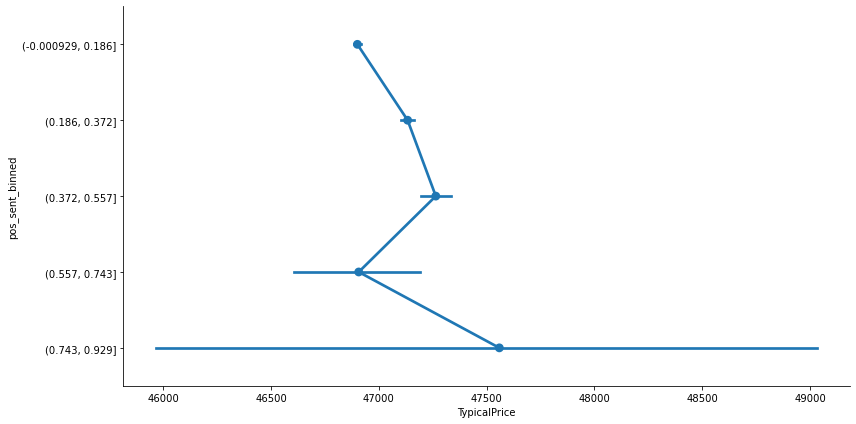

In [34]:
#a scatter plot depicting point estimations for categories with defined confidence intervals. 
sns.catplot(y='pos_sent_binned', data=df_full,x ='TypicalPrice', kind='point', aspect=2, height=6)

In [36]:
#created bins which is a type of data preprocessing
#mechanism which includes also dealing with missing values, formatting, normalization and standardization.
df_full['neg_sent_binned'] = pd.cut(df_full.Neg_Sentiment, bins=5)
df_full.neg_sent_binned.value_counts()

(-0.00098, 0.196]    2187309
(0.196, 0.392]         93579
(0.392, 0.588]         10683
(0.588, 0.784]          1484
(0.784, 0.98]             83
Name: neg_sent_binned, dtype: int64

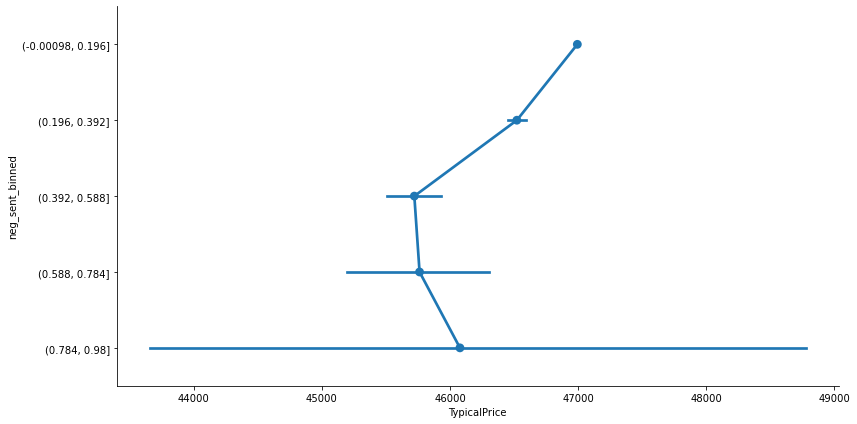

In [48]:
#Shows point estimates and confidence intervals using scatter plot graphs.
sns.catplot(y='neg_sent_binned', data=df_full,x ='TypicalPrice', kind='point', aspect=2, height=6)

In [41]:
#Rounding the DataFrame to a single decimal place. 
df_full['pos_sent_rounded'] = df_full['Positive_Sentiment'].round(decimals = 1)
df_full['neg_sent_rounded'] = df_full['Neg_Sentiment'].round(decimals = 1)
df_full['comp_sent_rounded'] = df_full['Compound_Sentiment'].round(decimals = 1)

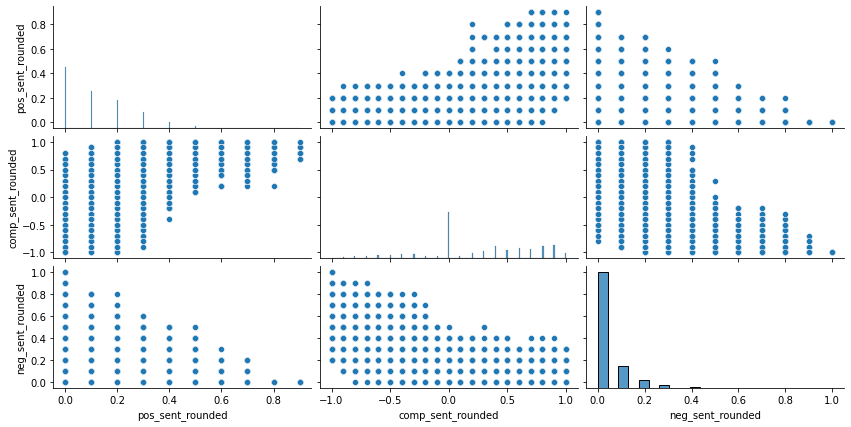

In [45]:
#Shows pair distribution of three variables and relationships between these variables.
sns.pairplot(df_full[['pos_sent_rounded', 'comp_sent_rounded', 'neg_sent_rounded']], palette="deep", aspect=2, height=2)